# CAB420, DCNNs, Additional Example 1: A Quick Introduction to Images
Author: Dr Simon Denman (s.denman@qut.edu.au)

## Overview
This example concerns images, and manipulating these in python. If you're already familar with how images are stored and can be manipulated, you can probably skip this. This example will look at some different image manipulation details such as:
* Loading and displaying images
* Cropping images
* Resizing images
* Reshaping images

All these things are used in other examples, and may be useful various bits of assessment.

It's important to note that within python, there are lots of different packages that can be used to manipulate images. In this example I'll use opencv, however skimage and PIL are also good choices, and have very similar functions to what is demonstrated below. If you are familar with one of those, feel free to use it throughout the semseter.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy

## Loading and Displaying Images
We can load an image with the imread function.
The result from imread is a matrix, and we can do the usual matrix things with it.

(400, 400, 3)


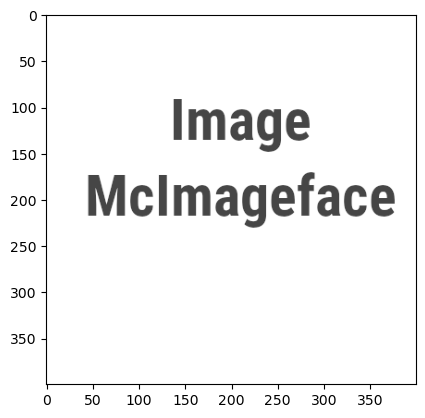

In [2]:
image = cv2.imread('SampleImage1.png')
print(image.shape)
plt.imshow(image);

Note that by default, opencv will try to load an image as a colour image - even if it's not. If we repeat the above and expliticly ask for a grayscale image, we get the following.

(400, 400)


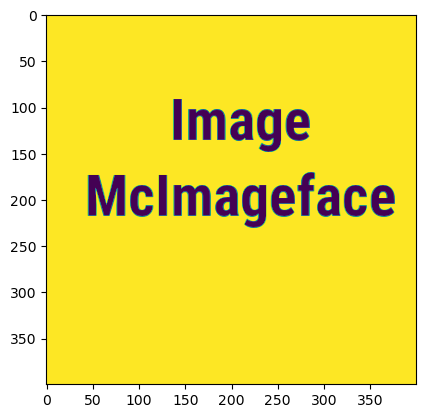

In [3]:
image = cv2.imread('SampleImage1.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image);

The result here is that our image is of size (400, 400) rather than (400, 400, 3). 

This 3 is important. For a colour image, we have 3 channels (red, green and blue), each of which is (400, 400). For the grayscale image, we have one channel. The grayscale image is shown differently due to the default colour map used by matplotlib. We can change that using the following:

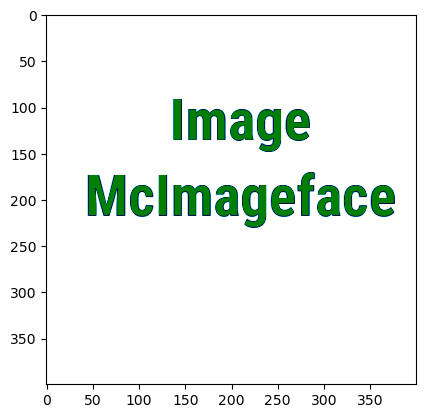

In [4]:
plt.imshow(image, cmap=plt.get_cmap('ocean'));

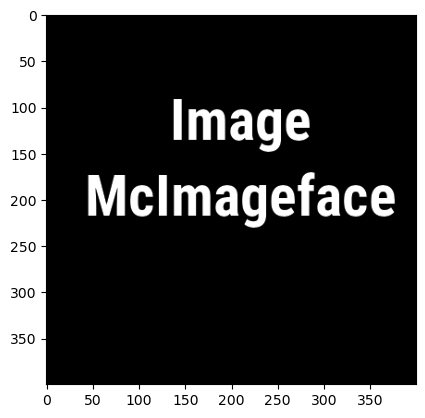

In [5]:
plt.imshow(image, cmap=plt.get_cmap('binary'));

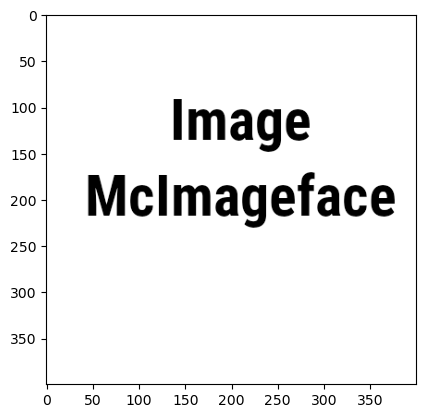

In [6]:
plt.imshow(image, cmap=plt.get_cmap('gray'));

There's a lot of colour maps to choose from, and the full list can be found [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

As noted above, as this is a matrix, we can do the usual matrix things such as a transpose. For example, we can transpose the image and display it.

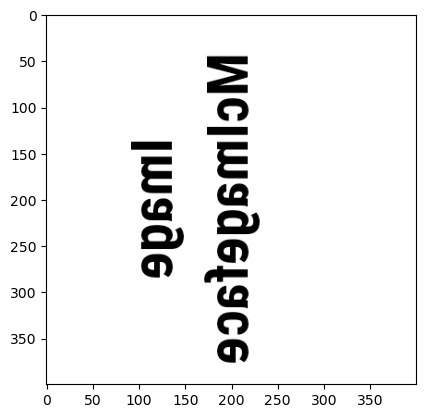

In [7]:
plt.imshow(numpy.transpose(image), cmap=plt.get_cmap('gray'));

## Another Image
Let's load a second image now. This ones a colour image, and so does in fact have three channels rather than 1.

(400, 400, 3)


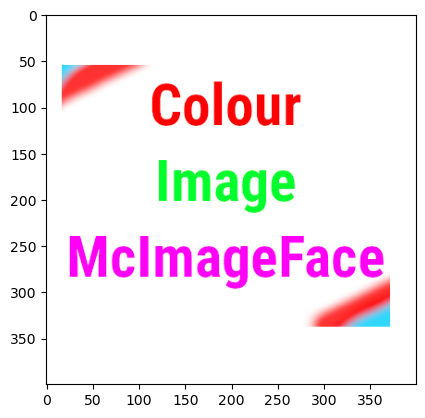

In [8]:
image = cv2.imread('SampleImage2.png')
print(image.shape)
plt.imshow(image);

However, if I want I can force opencv to load it as a grayscale image too.

(400, 400)


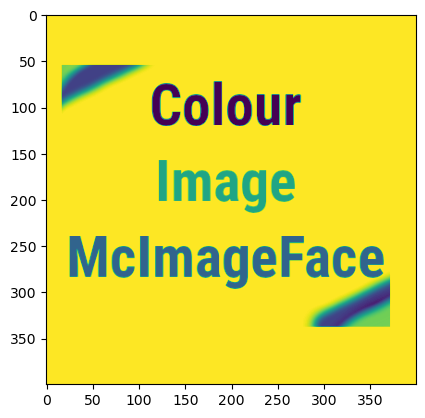

In [9]:
image = cv2.imread('SampleImage2.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image);

We can display the individual channels too, which gives the following:

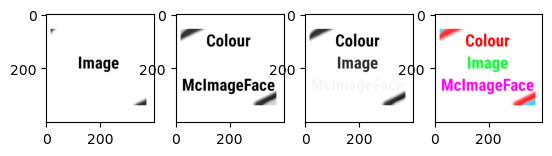

In [10]:
image = cv2.imread('SampleImage2.png')
fig, axs = plt.subplots(1, 4)
axs[0].imshow(image[:,:,0], cmap=plt.get_cmap('gray'));
axs[1].imshow(image[:,:,1], cmap=plt.get_cmap('gray'));
axs[2].imshow(image[:,:,2], cmap=plt.get_cmap('gray'));
axs[3].imshow(image);

This is perhaps not that intuitive, but in RGB (red green blue) colour space we have the following:
* White is all channels "on", i.e. when we have the maximum value possible for red, green and blue we have white.
* Individual colours, such as blue, then occur when we have a high value in the blue channel and low values elsewhere

The other thing to note here is that by default, opencv orders it's channels as BGR (i.e. blue, green, red) which is backwards to most other libraries, image viewers and general convention everywhere else in the computer vision world. That's why if you look at these images somewhere else, you may see different colours as the red and blue channels are swapped.

If I want to convert it, I can just use cvtColor. Note that if you use opencv's image display functions, this becomes less of an issue as opencv knows that the data is in BGR format and so will display accordingly, however those display functions don't work as well inside a notebook.

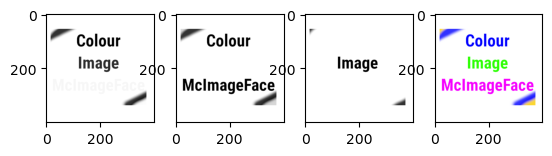

In [11]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 4)
axs[0].imshow(image[:,:,0], cmap=plt.get_cmap('gray'));
axs[1].imshow(image[:,:,1], cmap=plt.get_cmap('gray'));
axs[2].imshow(image[:,:,2], cmap=plt.get_cmap('gray'));
axs[3].imshow(image);

## A Third Image
To make this point clearer, let's load a third image with a dark background. Note that in this case, I'll load and colour convert the image (to RGB from OpenCV's default BGR) in one line.

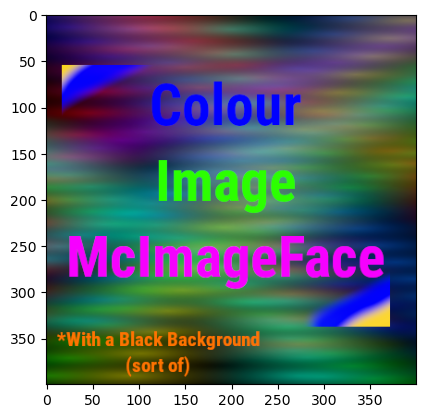

In [12]:
image3 = cv2.cvtColor(cv2.imread('SampleImage3.png'), cv2.COLOR_BGR2RGB)
plt.imshow(image3);

Again, we can display the image and it's individual channels.

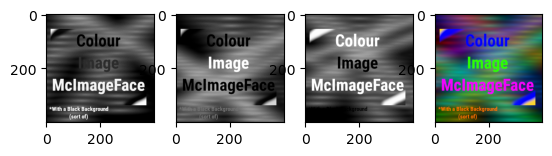

In [13]:
fig, axs = plt.subplots(1, 4)
axs[0].imshow(image3[:,:,0], cmap=plt.get_cmap('gray'));
axs[1].imshow(image3[:,:,1], cmap=plt.get_cmap('gray'));
axs[2].imshow(image3[:,:,2], cmap=plt.get_cmap('gray'));
axs[3].imshow(image3);

This time the colours of the text stand out more. The word "Colour" which is blue has a very low value in the red and green channels, and a high value in the blue channel. For "McImageFace", which is magenta, we see high values in red and blue (red and blue combine to make purple) and a low vaue in green. 

## Cropping Images
We've already used the : operator to select out individual image channels, and we can also use it to pull out parts of an image.

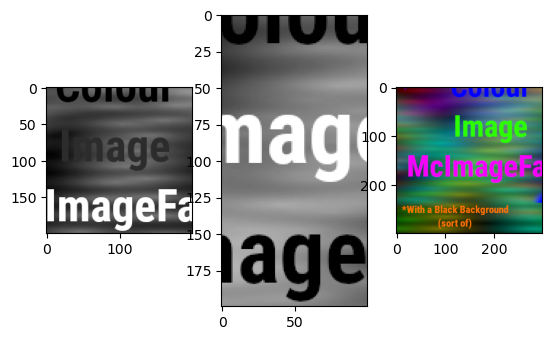

In [14]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image3[100:300,100:300,0], cmap=plt.get_cmap('gray'));
axs[1].imshow(image3[100:300,150:250,1], cmap=plt.get_cmap('gray'));
axs[2].imshow(image3[100:400,0:300,:]);

This really works just like any other array, and we can use all the usual array operations on the image.

## Image Data Types
Most images you encounter will store data as 8-bit values, i.e. [0..255]. This is also the case for the images we have here.

In [15]:
numpy.min(image3)

0

In [16]:
numpy.max(image3)

255

Often when we wish to use images in machine learning and data science, we need to convert the imges to doubles. This has impacts on how are images are then displayed.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


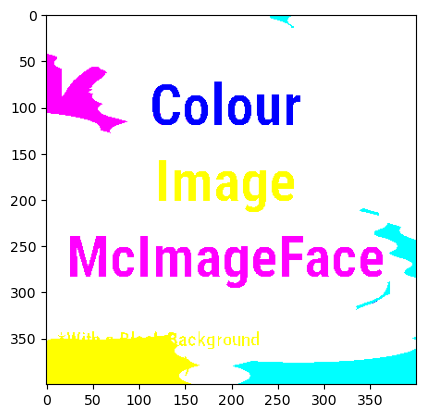

In [17]:
image3 = image3.astype('float32')
plt.imshow(image3);

We can see that our colours are all "blown out", and we've got channels either "on" or "off". 

When displaying an image that's of type "double", matplotlib (and most other image APIs) expects pixel values between 0 and 1. Any value greater than 1 gets treated as 1.

To overcome this, we need to scale our data by dividing by 255.

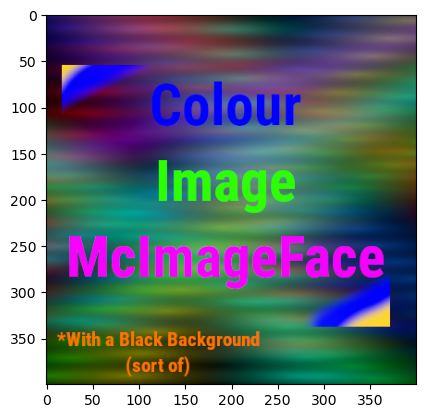

In [18]:
image3 = image3 / 255;
plt.imshow(image3);

In [19]:
numpy.min(image3)

0.0

In [20]:
numpy.max(image3)

1.0

We can see this gets our images into the range [0..1] and it now displays correctly.

If we need to check that type of data our image contains, we can simply check the data type of the numpy array like so:

In [21]:
image3.dtype

dtype('float32')

This is a point worth making clear here: if you display an image and don't get the results you expect, check the data type and the range of the data. If you data is of type uint8 (i.e. 8 bit unsigned char) then data should be in the range [0..255]. If your data is of type float32, or float64, or some other floating point type, then the data should be in the range [0..1]. If not you will get weird looking images when you go to display them.

## Resizing and Reshaping
We often wish to change the size or shape of our images. There are two broad types of operation to do this:
* Resize will resample the image, and can be used to get less or more pixels. This will use interpolation to achieve the desired size, and can change the width, height and total number of pixels.
* Reshaping will keep the same number of pixels, but will be change how they are arranged. This can be used to change the width and height and channels, but the total number of values must be the same.

### Resizing
The cv2.resize is the simplest way to resize an image, and we can simply give it some new dimensions and it will resize the image to those

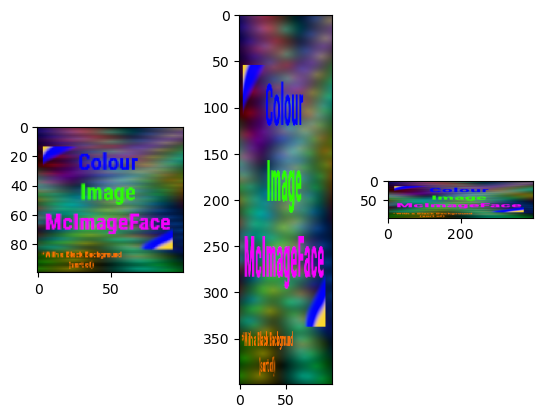

In [22]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(cv2.resize(image3, (100,100)));
axs[1].imshow(cv2.resize(image3, (100,400)));
axs[2].imshow(cv2.resize(image3, (400,100)));

We can also specify which method is used to interpolate the images. In this case, we don't get a lot of variation as the image is fairly simple, but for data with lots of texture information (i.e. lots of fine details) this can make a huge difference. cv2.INTER_LINEAR is the default, and a good choice if you're unsure.

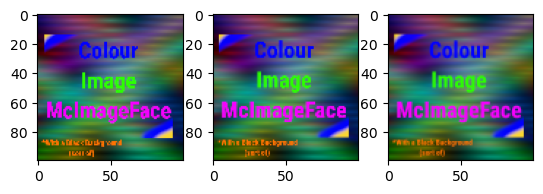

In [23]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(cv2.resize(image3, (100,100), interpolation=cv2.INTER_NEAREST));
axs[1].imshow(cv2.resize(image3, (100,100), interpolation=cv2.INTER_LINEAR));
axs[2].imshow(cv2.resize(image3, (100,100), interpolation=cv2.INTER_AREA));

### Colour Conversions
Note that resizing does not change the fact that we have a colour image, and cv2.resize cannot be used to change the number of channels. To do that we need to use conversion functions, such as cv2.cvtColor, to convert the colour image to a grayscale image. There are many other colour spaces that we may also wish to convert to, but they are beyond the scope of this demo, and unless you go into interesting directions in your project they are also outside the scope of CAB420 (though if you do want a colour space that separates luminance from colour, I'd recommend LAB).

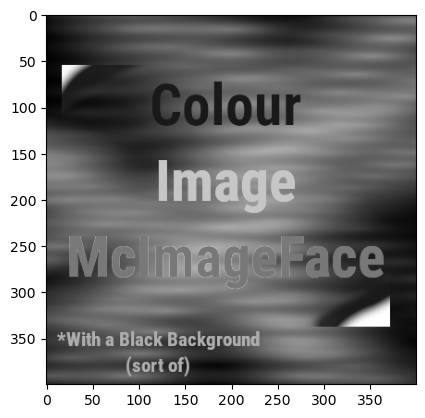

In [24]:
image3_gray = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
plt.imshow(image3_gray, cmap=plt.get_cmap('gray'));

### Reshaping
Sometimes we don't want to resize the image, but rather change the way the data is aranged. A common reason for this is our various learning methods. Consider an SVM for example, it wants each sample in it's own vector. To get an image into this shape, we need to reshape it. We don't want to get rid of data, just move it around so that rather than have a 400x400x3 image, we have a 480,000x1 vector.

Reshape is a function that lets us do this. 

As an example, we can use reshape to unpack the three image channels like this:

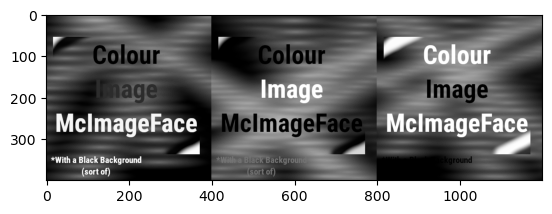

In [25]:
image3_reshape = numpy.reshape(image3, (400, 1200), order='F')
plt.imshow(image3_reshape, cmap=plt.get_cmap('gray'));

Note however that I can also get some pretty strange results doing this. The order in which pixels are accessed is important, and you should also be careful to check the output of any reshape to make sure it is what you intended.

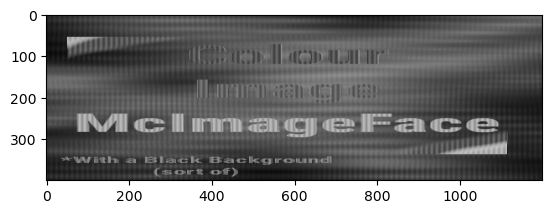

In [26]:
image3_reshape = numpy.reshape(image3, (400, 1200))
plt.imshow(image3_reshape, cmap=plt.get_cmap('gray'));

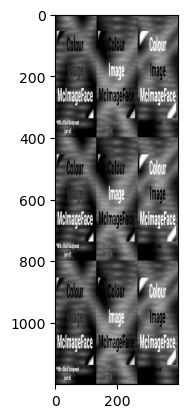

In [27]:
image3_reshape = numpy.reshape(image3, (1200, 400), order='F')
plt.imshow(image3_reshape, cmap=plt.get_cmap('gray'));

However we can reshape back into the orginal shape to get our original image back.

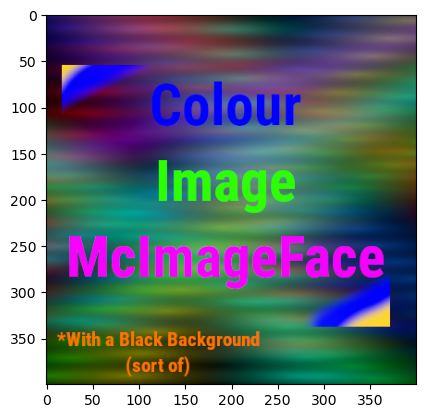

In [28]:
image3_reshape = numpy.reshape(image3, (400, 1200), order='F')
image3_rebuilt = numpy.reshape(image3_reshape, (400, 400, 3), order='F')
plt.imshow(image3_rebuilt);

Note however though that again, the order is important

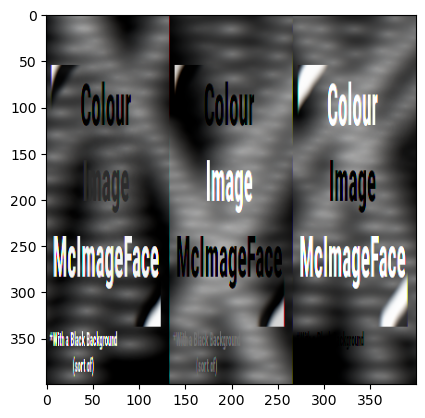

In [29]:
image3_rebuilt = numpy.reshape(image3_reshape, (400, 400, 3), order='C')
plt.imshow(image3_rebuilt);

While the above looks cool, it's not that useful and we'll rarely want to do it.

More commonly, as noted above, we'll want to "vectorise" our image, i.e. go from something of size $[W \times H \times D]$ to something of size $[(W\times H \times D)\times 1]$.

In [30]:
image3_vectorised = numpy.reshape(image3, (-1))
numpy.shape(image3_vectorised)

(480000,)

As per before, we can reverse the reshape to get our original data back.

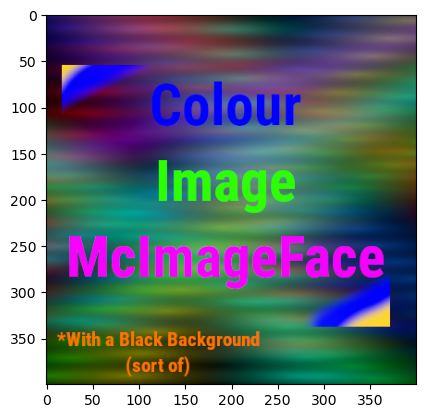

In [31]:
image3_unvectorised = numpy.reshape(image3_vectorised, (400, 400, 3));
plt.imshow(image3_unvectorised);

Critically in all of these cases, we can see that we don't remove or change any pixels. No values are changed or lost, we just change the way that they are ordered.

In practice, we may use a combination of resize, reshape, and colour conversions. For example we may have data that's a mix of colour and grayscale images, and of different sizes, which we want to learn from. In this case we may:
* Convert all data to grayscale
* Resize all images to a common size
* Reshape all images into vectors ready to be fed into a classification method

Whatever we do though, we need to be consistent for a given problem, and the idea of any of this pre-processing is to get our data into a consistent format. It's also important to visualise what you are doing as you go (particularly when you are new to this) as it's easy to corrupt the data, or do something that you didn't mean to. After each operation, display the data and make sure you have what you expect.

The final point to consider is if/when you do resize images, make sure that you're not losing the thing that's of interest. For example if you make images too small, then the details you are trying to detect will be lost, and no amount of fancy ML will help you. A good test for this is simply looking at the images yourself. If you make the images so small that you can no longer recognise the thing that's of interest, you've probably gone too far.